In [17]:
image_id = "CA184632V0344"
save_folder = "/data/ATM/data_1/sfm/projects/src_test/masks_orig"

In [18]:
import src.load.load_image as li

image = li.load_image(image_id)

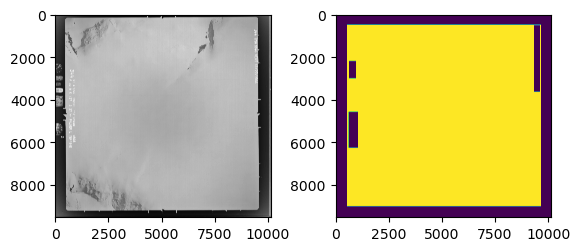

In [19]:
import src.base.connect_to_database as ctd
import src.base.create_mask as cm

import src.display.display_images as di

conn = ctd.establish_connection()

sql_string_fid_marks = f"SELECT * FROM images_fid_points WHERE image_id='{image_id}'"
data_fid_marks = ctd.execute_sql(sql_string_fid_marks, conn)

sql_string_extracted = f"SELECT * FROM images_extracted WHERE image_id='{image_id}'"
data_extracted = ctd.execute_sql(sql_string_extracted, conn)

# Get the fid marks for the specific image_id
fid_marks_row = data_fid_marks.loc[data_fid_marks['image_id'] == image_id].squeeze()

# Create fid mark dict using dictionary comprehension
fid_dict = {str(i): (fid_marks_row[f'fid_mark_{i}_x'], fid_marks_row[f'fid_mark_{i}_y']) for i in range(1, 5)}

# get the text boxes of the image
text_string = data_extracted.loc[data_extracted['image_id'] == image_id]['text_bbox'].iloc[0]

if len(text_string) > 0 and "[" not in text_string:
    text_string = "[" + text_string + "]"

# create text-boxes list
text_boxes = [list(group) for group in eval(text_string.replace(";", ","))]

# load the mask
mask = cm.create_mask(image, fid_dict, text_boxes)

di.display_images([image, mask])

In [20]:
import src.export.export_tiff as et


if save_folder is not None:
    save_path = save_folder + "/" + image_id + ".tif"
    et.export_tiff(mask, save_path, overwrite=True)

Image successfully exported to /data/ATM/data_1/sfm/projects/src_test/masks_orig/CA184632V0344.tif.
